<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/results/PAMPA_Solu_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [2]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet


In [3]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [ ]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *
from scripts.TRAIN import *
print('VOCAB TYPE:', VOCAB_TYPE)

# Evaluation on PAMPA, a dataset that is highly imbalanced.

## Therefore, weighted accuracy is a better metrics to evaluate performance

In [6]:
name = 'PAMPA_NCATS'

Found local copy...
Loading...
Done!


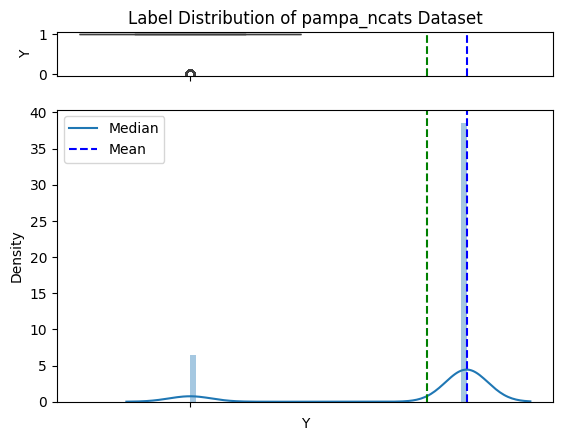

In [8]:
from tdc.single_pred import ADME
from tdc.single_pred import Tox
from tdc.utils import retrieve_label_name_list

data = ADME(name=name)
data.label_distribution()

## Single task, the results for all 4 algorithms MLP, ATP, GIN, RNN

In [11]:
folder_name = f'ST/{name}/'
d_metrics= {'reg': [0,2,3], 'cls': [0,1,6,8]}
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        file_name = folder_name + model_type + '_ST_' + str(i) + '.yml'
        p = yml_report(file_name)
        perfs.append(p)
    eval_perf_list(perfs, name, metrics_dict=d_metrics)


 ============================== MLP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       auc      |       ap      
	&0.852$\pm$0.005  &0.560$\pm$0.043  &0.764$\pm$0.009  &0.940$\pm$0.005  
 idx 1: &0.855            &0.584            &0.777            &0.946            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 2 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       auc      |       ap      
	&0.841$\pm$0.008  &0.575$\pm$0.029  &0.750$\pm$0.002  &0.925$\pm$0.003  
 idx 2: &0.837            &0.537            &0.751            &0.922            


 ============================== GIN ==============================
repeated num # 3 idx 2 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |  

### On single task, the best performance is GIN

In [13]:
print('GIN 3 time results')
model_type = 'GIN'
for i in range(3):
    file_name = folder_name + model_type + '_ST_' + str(i) + '.yml'
    p = yml_report(file_name)
    eval_perf_list([p], name, metrics_dict={})

GIN 3 time results
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.867   &0.636   &0.884   &0.971   &0.302   &0.925   &0.772   &0.383   &0.941   
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.872   &0.678   &0.897   &0.959   &0.397   &0.927   &0.781   &0.438   &0.942   
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.867   &0.636   &0.884   &0.971   &0.302   &0.925   &0.782   &0.383   &0.944   


## For MUE, the selection of multi-task to train together affects the final results.

#### E.g., train absorption and distribution tasks together, performance will be slightly worse than only train on absorption tasks.

`MUE on AD tasks:  ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']`

In [17]:
print('MUE on AD tasks: ', names_AD)
perfs = []
for i in range(3):
    file_name = f'AD_mix/uw/MUE_{name}_{i}.yml'
    p = yml_report(file_name)
    eval_perf_list([p], name, metrics_dict={})
    perfs.append(p)
print('\n\n')
best_idx = eval_perf_list(perfs, name, metrics_dict=d_metrics)

MUE on AD tasks:  ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.870   &0.664   &0.892   &0.962   &0.365   &0.926   &0.819   &0.417   &0.958   
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.860   &0.554   &0.860   &0.997   &0.111   &0.923   &0.822   &0.282   &0.958   
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.845   &0.500   &0.845   &1.000   &0.000   &0.916   &0.821   &nan   &0.958   



repeated num # 3 idx 0 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       auc      |       ap      
	&0.858$\pm$0.010  &0.573$\pm$0.068  &0.821$\pm$0.001  &0.958$\p

`MUE on Absorption tasks only:  ['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']`


In [19]:
print('MUE on Absorption tasks only: ', names_A3)
perfs = []
for i in range(3):
    file_name = f'A3/uw/MUE_{name}_{i}.yml'
    p = yml_report(file_name)
    eval_perf_list([p], name, metrics_dict={})
    perfs.append(p)
print('\n\n')
best_idx = eval_perf_list(perfs, name, metrics_dict=d_metrics)

MUE on Absorption tasks only:  ['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.882   &0.703   &0.904   &0.962   &0.444   &0.932   &0.827   &0.489   &0.958   
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.885   &0.698   &0.902   &0.968   &0.429   &0.934   &0.821   &0.493   &0.954   
******************** PAMPA_NCATS ******************** 
	|  acc  |  w_acc  |  prec  |  recall  |  sp  |  f1  |  auc  |  mcc  |  ap  
single: &0.882   &0.697   &0.902   &0.965   &0.429   &0.933   &0.817   &0.484   &0.953   



repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       auc      |       ap      
	&0.883$\pm$0.001  &0.699$\pm$0.003  &0.822$\pm$0.004  &0.955$\p

# Solubility evaluation

## Single task

Found local copy...
Loading...
Done!


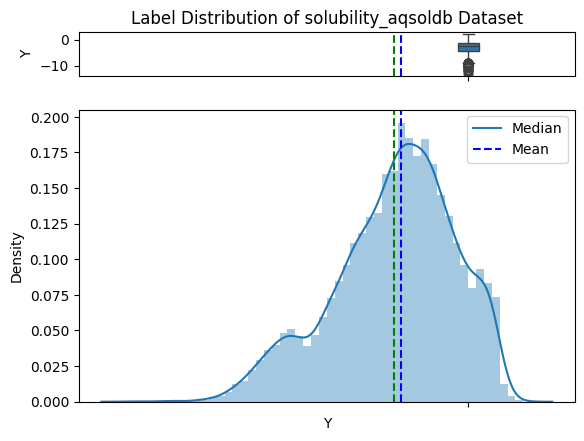

In [24]:
name = 'Solubility_AqSolDB'
data = ADME(name=name)
data.label_distribution()

In [22]:
folder_name = f'ST/{name}/'
d_metrics= {'reg': [0,2,3], 'cls': [0,1,6,8]}
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        file_name = folder_name + model_type + '_ST_' + str(i) + '.yml'
        p = yml_report(file_name)
        perfs.append(p)
    eval_perf_list(perfs, name, metrics_dict=d_metrics)


 ============================== MLP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Solubility_AqSolDB ******************** 
	|       mae      |       rmse      |       r2      
	&0.935$\pm$0.012  &1.286$\pm$0.016  &0.695$\pm$0.008  
 idx 1: &0.918            &1.273            &0.701            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Solubility_AqSolDB ******************** 
	|       mae      |       rmse      |       r2      
	&0.688$\pm$0.004  &1.005$\pm$0.007  &0.814$\pm$0.003  
 idx 1: &0.683            &0.996            &0.817            


 ============================== GIN ==============================
repeated num # 3 idx 2 has the lowest loss
******************** Solubility_AqSolDB ******************** 
	|       mae      |       rmse      |       r2      
	&0.805$\pm$0.022  &1.136$\pm$0.025  &0.762$\pm$0.010  
 idx 2: &0.773    

## AttentiveFP has the best performance on solubility task

In [25]:
model_type = 'AttentiveFP'
for i in range(3):
    file_name = folder_name + model_type + '_ST_' + str(i) + '.yml'
    p = yml_report(file_name)
    eval_perf_list([p], name, metrics_dict={})

******************** Solubility_AqSolDB ******************** 
	|  mae  |  mse  |  rmse  |  r2  
single: &0.694   &1.016   &1.008   &0.813   
******************** Solubility_AqSolDB ******************** 
	|  mae  |  mse  |  rmse  |  r2  
single: &0.683   &0.991   &0.996   &0.817   
******************** Solubility_AqSolDB ******************** 
	|  mae  |  mse  |  rmse  |  r2  
single: &0.688   &1.024   &1.012   &0.811   


### Similarly, MUE performs better if trained on absorption tasks only.

In [28]:
print('MUE on AD tasks: ', names_AD)
perfs = []
for i in range(3):
    file_name = f'AD_mix/uw/MUE_{name}_{i}.yml'
    p = yml_report(file_name)
    eval_perf_list([p], name, metrics_dict={})
    perfs.append(p)
print('\n')
best_idx = eval_perf_list(perfs, name, metrics_dict=d_metrics)

print('\n\n\n')
print('MUE on Absorption tasks only: ', names_A3)
perfs = []
for i in range(3):
    file_name = f'A3/uw/MUE_{name}_{i}.yml'
    p = yml_report(file_name)
    eval_perf_list([p], name, metrics_dict={})
    perfs.append(p)
print('\n\n')
best_idx = eval_perf_list(perfs, name, metrics_dict=d_metrics)

MUE on AD tasks:  ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
******************** Solubility_AqSolDB ******************** 
	|  mae  |  mse  |  rmse  |  r2  
single: &0.714   &1.006   &1.003   &0.815   
******************** Solubility_AqSolDB ******************** 
	|  mae  |  mse  |  rmse  |  r2  
single: &0.705   &0.992   &0.996   &0.817   
******************** Solubility_AqSolDB ******************** 
	|  mae  |  mse  |  rmse  |  r2  
single: &0.706   &0.985   &0.993   &0.818   


repeated num # 3 idx 2 has the lowest loss
******************** Solubility_AqSolDB ******************** 
	|       mae      |       rmse      |       r2      
	&0.709$\pm$0.004  &0.997$\pm$0.004  &0.817$\pm$0.002  
 idx 2: &0.706            &0.993            &0.818            





MUE on Absorption tasks only:  ['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
******************** Solubility_AqSolDB ******************** 
	|  mae  |  mse  |  rmse  |  r2  